**Importing the Dependencies**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
#from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


Loading the MNIST data from keras.datasets

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# shape of the numpy arrays
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
# printing the image
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

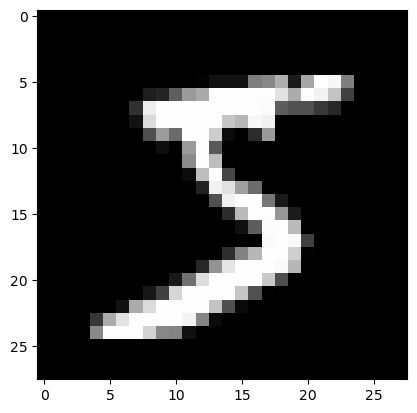

5


In [5]:
# displaying the image
plt.imshow(X_train[0], cmap='gray')
plt.show()
print(y_train[0])

In [6]:
# Unique values in y_train
print(np.unique(y_train))

# Unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

In [7]:
# Scaling the values
X_train  = X_train / 255
X_test = X_test / 255

In [8]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [9]:
# importing the required libraries
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [10]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(60, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

C:\Users\priya\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# Training the Neural Network
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.9123 - loss: 0.3026
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9616 - loss: 0.1305
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9721 - loss: 0.0945
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9779 - loss: 0.0746
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9828 - loss: 0.0602
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9852 - loss: 0.0502
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9878 - loss: 0.0421
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9892 - loss: 0.0370
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9905 - loss: 0.0323
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9910 - loss: 0.0290


In [12]:
# Accuracy on Test data
loss,accuracy = model.evaluate(X_test, y_test)
print("Accuracy is : ",accuracy*100)
print("Validation loss is :",loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9719 - loss: 0.1188
Accuracy is :  97.18999862670898
Validation loss is : 0.11881933361291885


In [13]:
y_pred = model.predict(X_test)
print(y_pred.shape)
print(y_pred[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step   
(10000, 10)
[2.7316627e-01 4.8121583e-04 3.1229392e-01 6.8929636e-01 2.5501490e-06
 1.3519699e-03 5.8695504e-10 9.9999934e-01 3.6479696e-04 9.9948174e-01]


In [14]:
# Converting the prediction Probabilities to class label
label_for_first_img = np.argmax(y_pred[0])
print(label_for_first_img)

7


In [15]:
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(6), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(2), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [16]:
#Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 952    0    4    1    3    0    5    1    3   11]
 [   0 1117    3    4    0    0    4    2    5    0]
 [   3    1 1006    5    2    0    3    5    7    0]
 [   0    0    2  982    2    1    0   10    5    8]
 [   0    1    5    1  966    0    2    2    0    5]
 [   1    0    0   23    3  840    8    2    7    8]
 [   6    1    0    1    3    2  945    0    0    0]
 [   1    1    9    3    3    0    0  998    0   13]
 [   2    0    6    6    5    0    5    7  935    8]
 [   0    3    0    4   16    1    0    3    4  978]], shape=(10, 10), dtype=int32)


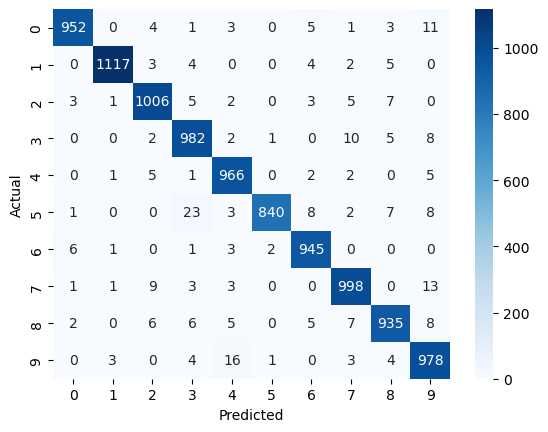

In [17]:
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Label: 4


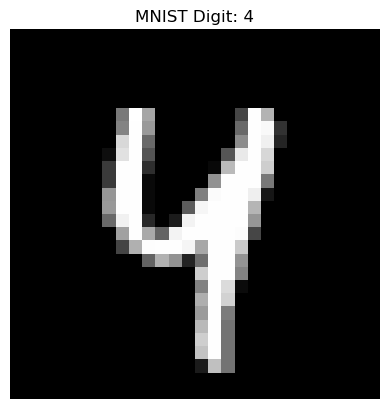

Image shape after preprocessing: (1, 28, 28, 1)


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Pick any random image
index = np.random.randint(0, len(X_test))
input_img = X_test[index]
label = y_test[index]

print("Label:", label)

# Show image
plt.imshow(input_img, cmap='gray')
plt.title(f"MNIST Digit: {label}")
plt.axis('off')
plt.show()

# Reshape for model input if needed
input_img = input_img.reshape(1, 28, 28, 1) / 255.0
print("Image shape after preprocessing:", input_img.shape)


In [19]:
input_img = input_img / 255

In [20]:
image_reshape = np.reshape(input_img, (1,28,28))

In [21]:
input_prediction = model.predict(image_reshape)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
[[0.21006295 0.36296552 0.17711854 0.17367014 0.52268016 0.7297486
  0.45001018 0.3530046  0.4931209  0.29985195]]


In [24]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

5


**Input Predictive System**

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import FileUpload, Button, Output, VBox
from IPython.display import display

# 1. Create widgets
uploader = FileUpload(accept='image/*', multiple=False)
predict_btn = Button(description='Predict Digit')
out = Output()

# 2. Define what happens when we click "Predict Digit"
def on_predict_clicked(b):
    out.clear_output()  # clear previous output

    if len(uploader.value) == 0:
        with out:
            print("Please upload an image first.")
        return

    # Compatible with JupyterLab: value is a tuple
    file_info = uploader.value[0]
    img_bytes = file_info['content']

    # Convert bytes to numpy array image
    nparr = np.frombuffer(img_bytes, np.uint8)
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

    if img is None:
        with out:
            print("Error: Could not read the uploaded image.")
        return

    # 3. Preprocess image (same as during training)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (28, 28))
    norm = resized / 255.0

    # Model expects shape (1, 28, 28)
    image_reshape = norm.reshape(1, 28, 28)

    # 4. Predict
    prediction = model.predict(image_reshape)
    pred_label = np.argmax(prediction)

    # 5. Show image + prediction
    with out:
        plt.imshow(resized, cmap='gray')
        plt.axis('off')
        plt.title(f"Predicted digit: {pred_label}")
        plt.show()

        print("Predicted digit:", pred_label)
        print("Raw probabilities:", prediction)

# 6. Connect button to function
predict_btn.on_click(on_predict_clicked)

# 7. Display the UI
display(VBox([uploader, predict_btn, out]))